# Data Preprocessing for Fruit Classification

This notebook handles the preprocessing of fruit images for our classification model.

In [9]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
import shutil
import matplotlib.pyplot as plt

In [10]:
# Directory setup
BASE_DIR = "/home/heangchihav/Documents/NMU/MachineLearning/machine_learning"
DATA_DIR = os.path.join(BASE_DIR, "data")
RAW_DIR = os.path.join(DATA_DIR, "raw/Fruit/Fruit-262")
PROCESSED_DIR = os.path.join(DATA_DIR, "preprocessed")

# Parameters
IMG_SIZE = 64
TEST_SPLIT = 0.2
CATEGORIES = ["grape", "apple"]

# Create directories if they don't exist
for split in ['train', 'test']:
    for category in CATEGORIES:
        os.makedirs(os.path.join(PROCESSED_DIR, split, category), exist_ok=True)

In [11]:
def process_image(img_path):
    """Process a single image"""
    # Read image
    img = cv2.imread(img_path)
    if img is None:
        return None
    
    # Convert to grayscale
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Resize
    img_resized = cv2.resize(img_gray, (IMG_SIZE, IMG_SIZE))
    
    return img_resized

In [12]:
def visualize_preprocessing(img_path):
    """Visualize the preprocessing steps for a single image"""
    # Original image
    img = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Processed image
    processed = process_image(img_path)
    
    # Display
    plt.figure(figsize=(10, 4))
    
    plt.subplot(1, 2, 1)
    plt.imshow(img_rgb)
    plt.title('Original Image')
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.imshow(processed, cmap='gray')
    plt.title(f'Processed Image ({IMG_SIZE}x{IMG_SIZE}, Grayscale)')
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()


Preprocessing example for grape:


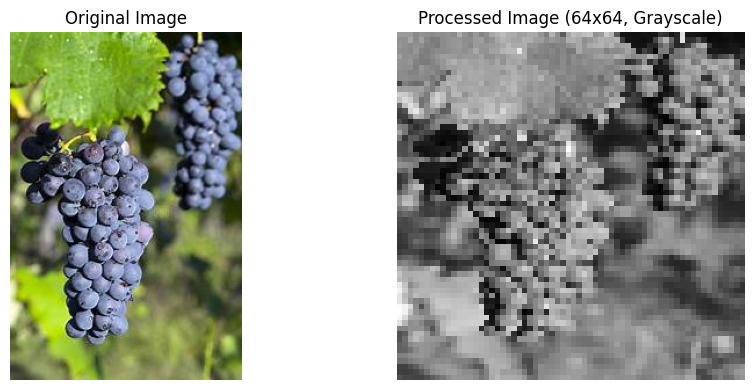


Preprocessing example for apple:


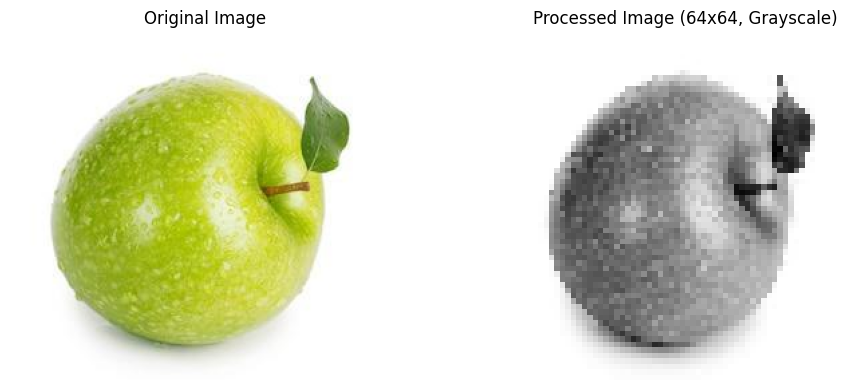

In [13]:
# Test preprocessing on one image from each category
for category in CATEGORIES:
    img_dir = os.path.join(RAW_DIR, category)
    if os.path.exists(img_dir) and os.listdir(img_dir):
        sample_img = os.path.join(img_dir, os.listdir(img_dir)[0])
        print(f"\nPreprocessing example for {category}:")
        visualize_preprocessing(sample_img)

In [14]:
def preprocess_and_split_data():
    """Preprocess all images and split into train/test sets"""
    for category in CATEGORIES:
        print(f"\nProcessing {category} images...")
        
        # Get list of images
        img_dir = os.path.join(RAW_DIR, category)
        images = os.listdir(img_dir)
        
        # Split into train/test
        train_images, test_images = train_test_split(
            images, 
            test_size=TEST_SPLIT, 
            random_state=42
        )
        
        print(f"Total images: {len(images)}")
        print(f"Training images: {len(train_images)}")
        print(f"Testing images: {len(test_images)}")
        
        # Process and save training images
        for img_name in train_images:
            img_path = os.path.join(img_dir, img_name)
            processed = process_image(img_path)
            if processed is not None:
                save_path = os.path.join(PROCESSED_DIR, 'train', category, img_name)
                cv2.imwrite(save_path, processed)
        
        # Process and save test images
        for img_name in test_images:
            img_path = os.path.join(img_dir, img_name)
            processed = process_image(img_path)
            if processed is not None:
                save_path = os.path.join(PROCESSED_DIR, 'test', category, img_name)
                cv2.imwrite(save_path, processed)
    
    print("\nPreprocessing completed!")

In [15]:
# Run the preprocessing
preprocess_and_split_data()


Processing grape images...
Total images: 1033
Training images: 826
Testing images: 207

Processing apple images...
Total images: 1203
Training images: 962
Testing images: 241

Preprocessing completed!


In [16]:
# Verify the processed data
for split in ['train', 'test']:
    print(f"\n{split.capitalize()} set:")
    for category in CATEGORIES:
        path = os.path.join(PROCESSED_DIR, split, category)
        num_images = len(os.listdir(path))
        print(f"{category}: {num_images} images")


Train set:
grape: 826 images
apple: 962 images

Test set:
grape: 207 images
apple: 241 images
